In [5]:
import xarray as xr
from pathlib import Path
import seaborn as sns 
import matplotlib.pyplot as plt

import splitting_isca_data as sid

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [6]:
isca_path = Path('/home/links/ct715/data_storage/isca/held-suarez')
isca_exp_list = isca_path.iterdir()

exp_list = sorted(item.name for item in isca_exp_list)
exp_list = [item for item in exp_list if item.startswith('HS')]
exp_list

['HS_T21-land_100y-nc',
 'HS_T21_100y-nc',
 'HS_T42-land_100y-nc',
 'HS_T42_100y-nc',
 'HS_T63-land_100y-nc',
 'HS_T63_100y-nc',
 'HS_T85-land_100y-nc',
 'HS_T85_100y-nc']

In [7]:
datasets = {}
for exp in exp_list:
    
    nc_path = Path(isca_path) / exp
    # nc_files = list(nc_path.glob('*.nc'))
    nc_files = nc_path.glob('*.nc')
    
    ds = xr.open_mfdataset(
        nc_files,
        chunks={'time': 360}
    )
    
    # datasets[exp] = ds.load()
    ds_seasonal = sid.seasonal_mean_datasets(ds)
    datasets[exp] = ds_seasonal

In [8]:
split_full = {
    'set1': slice('2000-12', '2099-09')
}

efp_HS = {}
for key, data in datasets.items():
    
    # split name for var saving
    key_splits = key.split('_')[:2]
    exp_name = f'{key_splits[0]}_{key_splits[1]}'
    
    # calculate EFP for various splits of data
    efp_HS[f'{exp_name}_8sets-99y'] = sid.split_and_process_data(data, split_full)

/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site

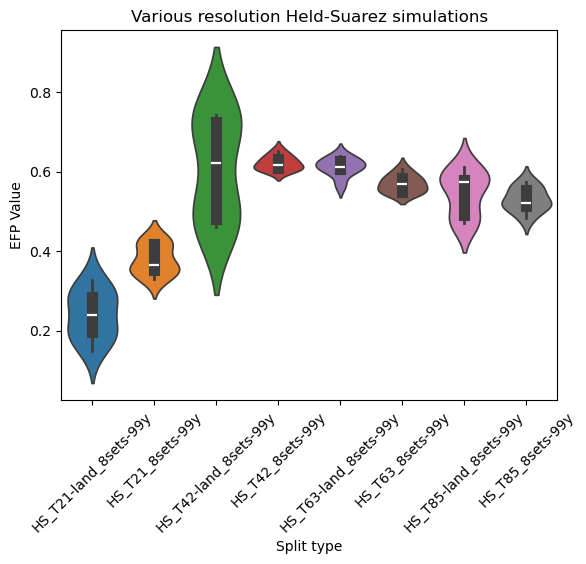

In [9]:
plt.figure()
sns.violinplot(
    data=efp_HS,
    inner_kws=dict(box_width=8, whis_width=2)
)
plt.title('Various resolution Held-Suarez simulations')
plt.xlabel('Split type')
plt.xticks(rotation=45)
plt.ylabel('EFP Value')
plt.show()

## No topography plots

In [10]:
remove_list = ['HS_T21-land_100y-nc', 'HS_T42-land_100y-nc', 'HS_T63-land_100y-nc', 'HS_T85-land_100y-nc']
exp_list_no_land = exp_list
for item in remove_list:
    exp_list_no_land.remove(item)
exp_list_no_land

['HS_T21_100y-nc', 'HS_T42_100y-nc', 'HS_T63_100y-nc', 'HS_T85_100y-nc']

In [11]:
datasets_no_land = {}
for exp in exp_list_no_land:
    
    nc_path = Path(isca_path) / exp
    # nc_files = list(nc_path.glob('*.nc'))
    nc_files = nc_path.glob('*.nc')
    
    ds = xr.open_mfdataset(
        nc_files,
        chunks={'time': 360}
    )
    
    # datasets[exp] = ds.load()
    ds_seasonal = sid.seasonal_mean_datasets(ds)
    datasets_no_land[exp] = ds_seasonal

In [12]:
split_full = {
    'set1': slice('2000-12', '2099-09')
}

efp_HS_no_land = {}
for key, data in datasets_no_land.items():
    
    # split name for var saving
    key_splits = key.split('_')[:2]
    exp_name = f'{key_splits[0]}_{key_splits[1]}'
    
    # calculate EFP for various splits of data
    efp_HS_no_land[f'{exp_name}_8sets-99y'] = sid.split_and_process_data(data, split_full)

/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.12/site

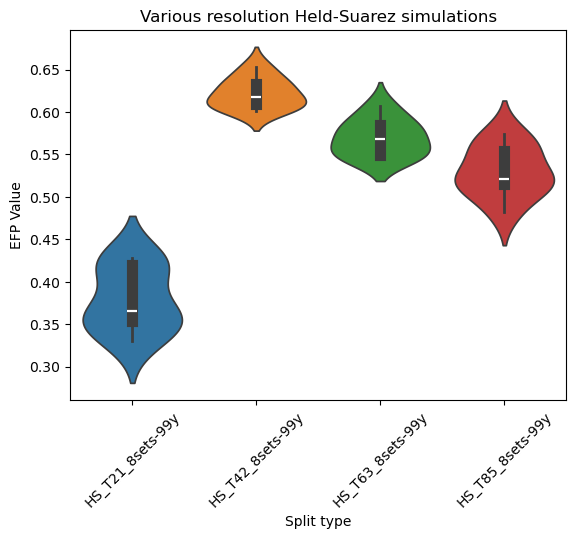

In [14]:
plt.figure()
sns.violinplot(
    data=efp_HS_no_land,
    inner_kws=dict(box_width=8, whis_width=2)
)
plt.title('Various resolution Held-Suarez simulations')
plt.xlabel('Split type')
plt.xticks(rotation=45)
plt.ylabel('EFP Value')
plt.show()